# Dense Networks

This notebook shows how to apply dense networks into real life data

### Import all the needed modules

In [1]:
import os # Used to create directory

import numpy as np
import pandas as pd # Used for reading datasets
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Used for data normalization
from sklearn.model_selection import train_test_split # Used for dataset division

### Define the path of the data source for convenience

The data can be downloaded here https://www.kaggle.com/c/microsoft-malware-prediction/data

In [2]:
CSV_PATH='train.csv'

### Read the first 10,000 rows of the data

In [3]:
df = pd.read_csv(CSV_PATH, nrows=10000)

### View the loaded dataset

In [4]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


### Extract the labels of the data

In [5]:
y = df['HasDetections'].values

In [6]:
y

array([0, 0, 0, ..., 1, 1, 0])

### Select a few columns as features

In [7]:
cols_to_use = ['ProductName', 'Platform', 'OsBuild', 'AVProductsInstalled']
X_raw = df[cols_to_use]
X_raw.head(5)

,ProductName,Platform,OsBuild,AVProductsInstalled
0,win8defender,windows10,17134,1.0
1,win8defender,windows10,17134,1.0
2,win8defender,windows10,17134,1.0
3,win8defender,windows10,17134,1.0
4,win8defender,windows10,17134,1.0


### Check the data for missing data

Here we see a missing data for `AVProductsInstalled`

### Impute the missing data

Using a conservative approach, all missing information are set to 0

In [8]:
X_raw.loc[X_raw['AVProductsInstalled'].isna(), 'AVProductsInstalled'] = 0

/home/snowtsuku/.miniconda/envs/machine-learning/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
X_raw.isna().any(axis=0)

ProductName            False
Platform               False
OsBuild                False
AVProductsInstalled    False
dtype: bool

### Split the data to training and test

In [10]:
train_X_raw, test_X_raw, train_y, test_y = train_test_split(X_raw, y, test_size=0.2, random_state=0, stratify=y)
print(f'train_X_raw: {train_X_raw.shape}')
print(f'test_X_raw: {test_X_raw.shape}')
print(f'train_y: {train_y.shape}')
print(f'test_y: {test_y.shape}')

train_X_raw: (8000, 4)
test_X_raw: (2000, 4)
train_y: (8000,)
test_y: (2000,)


### Define encoders to convert the data to numeric

In [11]:
encoders = [
    OneHotEncoder(sparse=False, handle_unknown='ignore'), # ProductName
    OneHotEncoder(sparse=False, handle_unknown='ignore'), # Platform
    OneHotEncoder(sparse=False, handle_unknown='ignore', categories='auto'), # OsBuild
    StandardScaler(), # AVProductsInstalled
]

### Encode the training data. Note the use of the ```fit_transform``` for the training encoding

In [12]:
train_X = []
for e, c in zip(encoders, train_X_raw.columns):
    column_np = train_X_raw[[c]].values
    column_encoded = e.fit_transform(column_np)
    train_X.append(column_encoded)
train_X = np.concatenate(train_X, axis=1)
train_X.shape

(8000, 27)

### Encode the test data. Note the use of ``transform`` only for the testing encoding

In [13]:
test_X = []
for e, c in zip(encoders, test_X_raw.columns):
    column_np = test_X_raw[[c]].values
    column_encoded = e.transform(column_np)
    test_X.append(column_encoded)
test_X = np.concatenate(test_X, axis=1)
test_X.shape

(2000, 27)

### Create a Keras model to train for training

In [14]:
input_ = tf.keras.layers.Input(shape=(27,))
dense1 = tf.keras.layers.Dense(256, activation='relu')(input_)
reg1 = tf.keras.layers.Dropout(0.1)(dense1) # tf.keras.layers.BatchNormalization()(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(reg1)
reg2 = tf.keras.layers.Dropout(0.1)(dense2) # tf.keras.layers.BatchNormalization()(dense1)
# dense3 = tf.keras.layers.Dense(256, activation='relu', 
#                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(reg2)
dense3 = tf.keras.layers.Dense(256, activation='relu')(reg2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)

In [15]:
model = tf.keras.Model(inputs=input_, outputs=output)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               7168      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257   

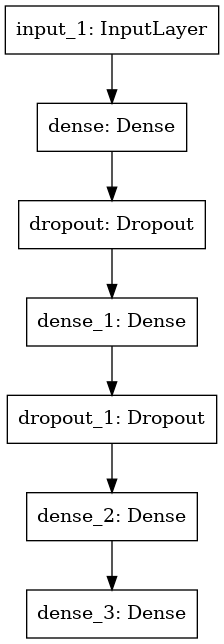

In [17]:
tf.keras.utils.plot_model(model)

In [18]:
model.compile('adam', 'binary_crossentropy')

### Define an early stop

This allows the training to stop if the validation loss does not improve after ```patience``` number of epochs

In [19]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

### Define a model checkpoint

This will save the model based on the parameters passed. In this model checkpoint, the best model is saved

In [20]:
MODEL_PATH = 'checkpoints/model_at_{epoch:02d}.mdl'
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(MODEL_PATH, )

### Train the model

Add a validation split to check for overfitting and provide the early stop and model checkpoint as callbacks

In [21]:
training_history = model.fit(train_X, train_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stop, model_checkpoint])

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6336/6400 [============================>.] - ETA: 0s - loss: 0.6850WARNING:tensorflow:From /home/snowtsuku/.miniconda/envs/machine-learning/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoints/model_at_01.mdl/assets
6400/6400 [==============================] - 3s 395us/sample - loss: 0.6852 - val_loss: 0.6877
Epoch 2/100
6400/6400 [==============================] - 2s 268us/sample - loss: 0.6820 - val_loss: 0.6922
Epoch 3/100
6400/6400 [==============================] - 2s 276us/sample - loss: 0.6817 - val_loss: 0.6887
Epoch 4/100
6400/6400 [==============================] - 2s 238us/sample - loss: 0.6809 - val_

### Save the model

In [22]:
SAVED_MODEL_PATH = 'model.mdl'
model.save(SAVED_MODEL_PATH)

INFO:tensorflow:Assets written to: model.mdl/assets


### Load the saved model

In [23]:
saved_model = tf.keras.models.load_model(SAVED_MODEL_PATH)

### Verify the structure of the loaded model

In [24]:
saved_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               7168      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257   

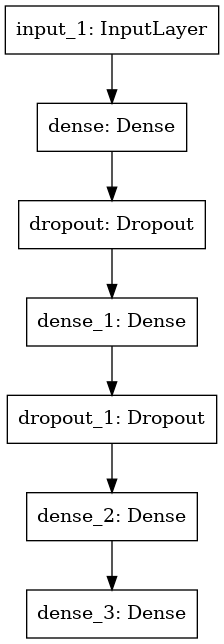

In [25]:
tf.keras.utils.plot_model(saved_model)

### Consume the best model

Prediction and evaluation can be performed on the best model

In [26]:
test_y_pred = saved_model.predict(test_X)

In [27]:
saved_model.evaluate(test_X, test_y)

2000/2000 [==============================] - 0s 98us/sample - loss: 0.6860


0.6859685964584351